# Numerical solution of boundary value problems (BVPs)

This notebook gives an example on how to use Python, Numpy, Scipy and Matplotlib, to numerically solve a 2nd order boundary value problem. The numerical solver used is `scipy.integrate.solve_bvp` (implementing a 4th order collocation method). [The API documentation for `solve_bvp` can be found in the Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html).

## Example BVP

We will consider the boundary value problem

$$
\left\{\begin{array}{c}
y'' = 6 y^{\frac{1}{3}} \\
y(1) = 1 \\
y(2) = 8
\end{array}\right.
$$

with analytic solution $y(x) = x^3$ and perform the following steps.

### Steps
1. Formulate the second order differential equation as a system of coupled first order ordinary differential equations (ODEs).
2. Set up the ODE system as a vector valued function.
4. Use `scipy.integrate.solve_bvp` to solve the BVP numerially.
5. Use Matplotlib to visualize the numerical an analytic solutions.
6. Plot the error of the numerical solution.

## Higher order ODE as system of 1st order ODEs

In order to perform step 1 we reiterate the theory for higher order ODEs and their relation to systems of 1st order ODEs.

Consider the $n$th order ODE
$$
y^{(n)} = f(x, y, y', y'', ..., y^{(n-1)}) \, .
$$
By defining the variables
$$
y_1 = y \\
y_2 = y' \\
y_3 = y'' \\
\vdots \\
y_n = y^{(n-1)}
$$
The $n$th order ODE can be written as
$$
y_n' = f(x, y_1, y_2, ..., y_n) = f(x, \mathbf{y})
$$
Thus, the $n$th order ODE can be written as the system of 1st order ODEs as
$$
\mathbf{y}' = \mathbf{f}(x, \mathbf{y})
$$
where $\mathbf{y} = [y_1, y_2, ..., y_n]$ and 
$$
\mathbf{f}(x, \mathbf{y}) = [y_2, y_3, ..., y_n, f(x, \mathbf{y})]
$$
Hence, any $n$th order ODE can be rewritten as a system of $n$ 1st order ODEs.

## Step 1: Rewrite as system of 1st order ODEs

Using the above theory we let
$$
y_1 = y \\
y_2 = y'
$$
Rewriting the 2nd order ODE now gives
$$
\left\{\begin{array}{c}
y_1' = y_2 \\
y_2' = 6y_1^{\frac{1}{3}}
\end{array}\right.
$$
with boundary conditions $y_1(1) = 1$ and $y_1(2) = 8$.

On vector form this is equivalent to $\mathbf{y} = [y_1, y_2]$ and $\mathbf{f}(x, \mathbf{y}) = [y_2, 6y_1^{\frac{1}{3}}]$.

## Step 2: Setup the ODE system as a vector valued function

Given the above right hand side function `f` we implement it as a Python function `f(x,y)`, where the input argument `y` is a vector and keeping in mind that Python index vectors from 0.

In [40]:
def f(x, y):
    return [y[1], 6*y[0]**(1/3)]

To use the BVP solver we also need a function that, given the solutions $y_A$ and $y_B$ on the two sides $A$ and $B$ of the solution interval returns the boundary conditions as zero constraints, see the BVP solver documentation for details. For our case the boundary conditions are given by
$$
y_A = y(x_A) = y_1(1) = 1 \quad \Rightarrow \quad y_1(x_A) - 1 = 0 \\
y_B = y(x_B) = y_1(2) = 8 \quad \Rightarrow \quad y_1(x_B) - 8 = 0 
$$

Implenmenting this function as `bc(ya, yb)` gives:

In [41]:
def bc(ya, yb):
    return [ya[0] - 1, yb[0] - 8]

## Step 3: Solve the BVP numerically

We are now ready to solve the BVP numerically using an initial grid in $x$ and an initial guess for $\mathbf{y}(x)$.

In [49]:
# Import Numpy and the BPV solver from Scipy

import numpy as np
from scipy.integrate import solve_bvp

# Initial grid in x
x0 = np.linspace(1, 2, num=10)

# Initial guess: y_1(x) = 1, y_2(x) = 1
y0 = np.ones((2, len(x0)))

# Numerical BVP solution
sol = solve_bvp(f, bc, x0, y0, tol=1e-5, verbose=2)

# Get numerical solution for 2nd order ODE y(x) = y_1(x)
x_numeric = sol.x
y_numeric = sol.y[0]

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.76e-07       0.00e+00          10              0       
Solved in 1 iterations, number of nodes 10. 
Maximum relative residual: 1.76e-07 
Maximum boundary residual: 0.00e+00


## Step 4: Visualize solution

To visualize the solution we use Matplotlib and compare the numerical result with the known analytical solution $y(x) = x^3$.

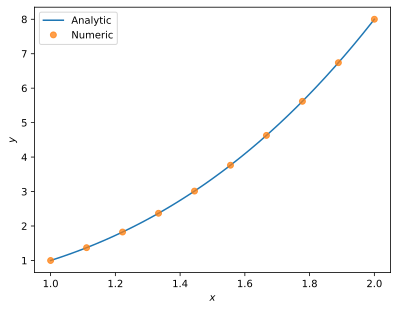

In [46]:

# Analytical solution (on dense grid)
x_analytic = np.linspace(1, 2, num=1000)
y_analytic = x_analytic**(3)

# Import Matplotlib and setup notebook plotting environment
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

# Plot the numerical an analytic solution in the same plot
plt.plot(x_analytic, y_analytic, '-', label='Analytic')
plt.plot(x_numeric, y_numeric, 'o', label='Numeric', alpha=0.75)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$');

## Step 5: Visualize error

The numerical solution is only accurate to the precision `tol` requested from the numerical solver. Since we know the analytical solution we can also compute the error of the numerical result on the interval and plot it on using a logarithmic scale on the y-axis.

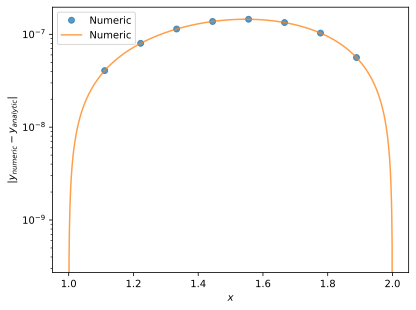

In [47]:
# Numerical error on the grid selected by the BVP solver
y_err = x_numeric**(3) - y_numeric
# Numerical error on a dense grid, interpolating the numerical solution
y_err_fine = x_analytic**(3) - sol.sol(x_analytic)[0]

# Plot absolute value of the error with a logarithmic scale on the y-axis
plt.semilogy(x_numeric, np.abs(y_err), 'o', label='Numeric', alpha=0.75)
plt.semilogy(x_analytic, np.abs(y_err_fine), '-', label='Numeric', alpha=0.75)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$|y_{numeric}-y_{analytic}|$');